# Phishing Classification

This analysis is based on data retrieved from XXX


Importing Packages.

In [29]:
import pandas as pd
import numpy as np

# data preprocessing
from sklearn import preprocessing

# exploratory analysis
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import seaborn as sns

# model fit
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import tensorflow as tf
# ignore warnings (libraries are rapidly changing)
import warnings
warnings.filterwarnings('ignore')

## Import data
Import the data the inspect the contents.

In [5]:
# read data
init_df = pd.read_csv('dataset_small.csv', sep=',')

# print shape of df, number of countries, and time period covered
print('Shape of data: ', init_df.shape)
init_df.head()

Shape of data:  (58645, 112)


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


In [8]:
print('Columns: ', list(init_df.columns))

Columns:  ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip', 'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory',

In [10]:
# let's use data and init_df interchangeablly
data = init_df
data.dtypes

qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
phishing                int64
Length: 112, dtype: object

In [11]:
## Inspect and
data.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,...,1.110666,2.829619,1.630113,5056.676272,0.501373,0.303419,0.001279,0.002234,0.008287,0.522585
std,1.473209,1.339340,0.801919,2.037525,0.138156,1.159198,0.343272,1.130323,0.107352,0.089320,...,0.912962,1.377018,1.719554,7102.853538,0.500002,0.815315,0.037599,0.047927,0.090657,0.499494
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,1191.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,9866.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,16.000000,20.000000,86400.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


## Understanding the Data
### Input variables
1. Qty features indicate the number of specific characters in each part of the URL
+ URL
+ Domain
+ Directory
+ File
+ Params

2. Phishing - 0 normal url, 1 phishing url

In [13]:
data.phishing.value_counts()

phishing
1    30647
0    27998
Name: count, dtype: int64

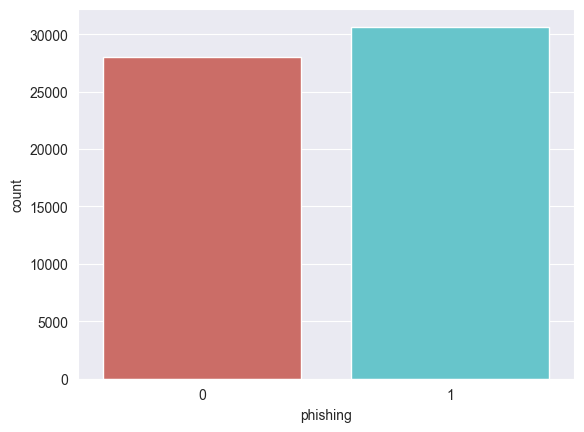

<Figure size 640x480 with 0 Axes>

In [14]:
sns.countplot(x='phishing',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

In [15]:
## Data Summarization
data.groupby('phishing').mean()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
phishing,,,,,,,,,,,,,,,,,,,,,
0,2.067719,0.259840,0.044789,0.661619,0.000393,0.049111,0.000071,0.024502,0.001786,0.000000,...,379.129724,1.121866,3.024395,1.711694,4034.522609,0.523109,0.332024,0.001929,0.002393,0.000321
1,2.482233,0.637354,0.286847,3.103142,0.026626,0.550592,0.063954,0.385127,0.006885,0.002937,...,215.491957,1.100434,2.651679,1.555585,5990.479199,0.481515,0.277287,0.000685,0.002088,0.015564


**Observation**

1. asterisk, hashtag, dollar are all not in normal URLs and only in Phishing URLs
2. phishing URLs tend to be much longer
3. slash, question, equal, and, exclamation, space, tilde, comma, plus, asterisk, hash, dollar, percent are not valid character for domain in either category.  These features can be dropped
4. Need to understand what `-` means in directory
5. directory_length is much longer for phishing sites
6. file_length is much longer for phishing sites
7. params_length much longer for phishing sites
8. time_domain_activation is much shorter for phishing sites
9. time_domain_expiration is much shorter for phishing sites


In [ ]:
###
### TBD ###
### Review relationship of length to phishiing prediction

In [42]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=30)
data_x = data.drop('phishing', axis=1)

rfe = rfe.fit(data_x,data.phishing)
Selected_Features_Support = list(rfe.support_)
Selected_Features_rank = list(rfe.ranking_)

In [43]:
Features = data_x.columns.tolist()
Selected_Features = np.column_stack((Features,Selected_Features_Support,Selected_Features_rank))
print(Selected_Features)

[['qty_dot_url' 'False' '37']
 ['qty_hyphen_url' 'False' '31']
 ['qty_underline_url' 'False' '45']
 ['qty_slash_url' 'True' '1']
 ['qty_questionmark_url' 'False' '28']
 ['qty_equal_url' 'False' '33']
 ['qty_at_url' 'True' '1']
 ['qty_and_url' 'False' '27']
 ['qty_exclamation_url' 'False' '59']
 ['qty_space_url' 'False' '48']
 ['qty_tilde_url' 'False' '67']
 ['qty_comma_url' 'False' '3']
 ['qty_plus_url' 'True' '1']
 ['qty_asterisk_url' 'True' '1']
 ['qty_hashtag_url' 'False' '63']
 ['qty_dollar_url' 'False' '65']
 ['qty_percent_url' 'False' '14']
 ['qty_tld_url' 'True' '1']
 ['length_url' 'False' '46']
 ['qty_dot_domain' 'True' '1']
 ['qty_hyphen_domain' 'True' '1']
 ['qty_underline_domain' 'False' '42']
 ['qty_slash_domain' 'False' '70']
 ['qty_questionmark_domain' 'False' '71']
 ['qty_equal_domain' 'False' '80']
 ['qty_at_domain' 'False' '68']
 ['qty_and_domain' 'False' '72']
 ['qty_exclamation_domain' 'False' '81']
 ['qty_space_domain' 'False' '79']
 ['qty_tilde_domain' 'False' '78'

In [58]:
selected_idx = Selected_Features[:, 1] == 'True'
final_selection = Selected_Features[selected_idx,0]
#final_selection = np.append(final_selection, 'directory_length')
print(final_selection)


['qty_slash_url' 'qty_at_url' 'qty_plus_url' 'qty_asterisk_url'
 'qty_tld_url' 'qty_dot_domain' 'qty_hyphen_domain' 'domain_in_ip'
 'server_client_domain' 'qty_dot_directory' 'qty_hyphen_directory'
 'qty_equal_directory' 'qty_at_directory' 'qty_and_directory'
 'qty_exclamation_directory' 'qty_comma_directory' 'qty_plus_directory'
 'qty_asterisk_directory' 'qty_underline_file' 'qty_exclamation_file'
 'qty_comma_file' 'qty_underline_params' 'qty_slash_params'
 'qty_at_params' 'tld_present_params' 'email_in_url' 'qty_nameservers'
 'tls_ssl_certificate' 'domain_google_index' 'url_shortened']


In [59]:
X = data_x[final_selection]
y = data['phishing']

print("X Shape:", X.shape)
print("y Shape:", y.shape)


X Shape: (58645, 30)
y Shape: (58645,)


### Model Implementation
Let's do a Test v. Train of 70% v 30%


In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

## Calculating the accuracy
print('Accuracy of logistic regression classifier on test set: {:2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.852848


In [61]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10)

modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train,y_train, cv = kfold, scoring = scoring)
print("10-fold cross-validation average accuracy : %.3f" % (results.mean()))

10-fold cross-validation average accuracy : 0.854


In [34]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=18)
data_x = data.drop('phishing', axis=1)

rfe = rfe.fit(data_x, data.phishing)
Selected_Features_Support = list(rfe.support_)
Selected_Features_rank = list(rfe.ranking_)


In [35]:
Features = data_x.columns.tolist()
Selected_Features = np.column_stack((Features, Selected_Features_Support, Selected_Features_rank))
print(Selected_Features)

[['qty_dot_url' 'False' '49']
 ['qty_hyphen_url' 'False' '43']
 ['qty_underline_url' 'False' '57']
 ['qty_slash_url' 'True' '1']
 ['qty_questionmark_url' 'False' '40']
 ['qty_equal_url' 'False' '45']
 ['qty_at_url' 'True' '1']
 ['qty_and_url' 'False' '39']
 ['qty_exclamation_url' 'False' '71']
 ['qty_space_url' 'False' '60']
 ['qty_tilde_url' 'False' '79']
 ['qty_comma_url' 'False' '15']
 ['qty_plus_url' 'False' '2']
 ['qty_asterisk_url' 'True' '1']
 ['qty_hashtag_url' 'False' '75']
 ['qty_dollar_url' 'False' '77']
 ['qty_percent_url' 'False' '26']
 ['qty_tld_url' 'False' '8']
 ['length_url' 'False' '58']
 ['qty_dot_domain' 'True' '1']
 ['qty_hyphen_domain' 'True' '1']
 ['qty_underline_domain' 'False' '54']
 ['qty_slash_domain' 'False' '82']
 ['qty_questionmark_domain' 'False' '83']
 ['qty_equal_domain' 'False' '92']
 ['qty_at_domain' 'False' '80']
 ['qty_and_domain' 'False' '84']
 ['qty_exclamation_domain' 'False' '93']
 ['qty_space_domain' 'False' '91']
 ['qty_tilde_domain' 'False' '

In [36]:
selected_idx = Selected_Features[:, 1] == 'True'
final_selection = Selected_Features[selected_idx,0]
print(final_selection)

['qty_slash_url' 'qty_at_url' 'qty_asterisk_url' 'qty_dot_domain'
 'qty_hyphen_domain' 'domain_in_ip' 'server_client_domain'
 'qty_dot_directory' 'qty_equal_directory' 'qty_exclamation_directory'
 'qty_comma_directory' 'qty_exclamation_file' 'qty_comma_file'
 'qty_underline_params' 'qty_at_params' 'tld_present_params'
 'email_in_url' 'url_shortened']


In [37]:
X = data_x[final_selection]
y = data['phishing']

print("X Shape:", X.shape)
print("y Shape:", y.shape)


X Shape: (58645, 18)
y Shape: (58645,)


In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

## Calculating the accuracy
print('Accuracy of logistic regression classifier on test set: {:2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.842901


In [41]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10)

modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train,y_train, cv = kfold, scoring = scoring)
print("10-fold cross-validation average accuracy : %.3f" % (results.mean()))

10-fold cross-validation average accuracy : 0.843


In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6793 1544]
 [1045 8212]]


Thus, True Positive = 6793, False Positive = 1045, True Negative = 8212, False Negative = 1544

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F score = 2 * (Precision * Recall)/(Precision + Recall)

** Calculating Precission, Recall & F1 score**

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      8337
           1       0.84      0.89      0.86      9257

    accuracy                           0.85     17594
   macro avg       0.85      0.85      0.85     17594
weighted avg       0.85      0.85      0.85     17594

